In [33]:
''''

Data manipulation, visulaisation and analysis of IPL 2022 Auctio


''''



import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [18]:
ipl = pd.read_csv("ipl_2022_dataset.CSV")

In [29]:
ipl.head()

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [ ]:
'''shape in Python?
shape is a tuple that always gives dimensions of the array.
Example: total players-633 and total attributes(columns)-8'''

In [21]:
ipl.shape

(633, 8)

In [22]:
ipl.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       633 non-null    int64  
 1   Player           633 non-null    object 
 2   Base Price       633 non-null    object 
 3   TYPE             633 non-null    object 
 4   COST IN ₹ (CR.)  237 non-null    float64
 5   Cost IN $ (000)  237 non-null    float64
 6   2021 Squad       199 non-null    object 
 7   Team             633 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 39.7+ KB


In [39]:
ipl.columns

Index(['Unnamed: 0', 'Player', 'Base Price', 'TYPE', 'COST IN ₹ (CR.)',
       'Cost IN $ (000)', '2021 Squad', 'Team'],
      dtype='object')

In [41]:
'''Dropping a column named unmaned by drop() method
inplace removes the column unnamed permanently from the dataframe
axis: 1 is for column wise operations and 0 is for row wise operations.
'''

ipl.drop('Unnamed: 0', axis=1, inplace = True)

In [42]:
ipl.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [43]:
#Let's see the total number of null values in each column of the dataset

ipl.isnull().sum()

Player               0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)    396
Cost IN $ (000)    396
2021 Squad         434
Team                 0
dtype: int64

In [44]:
#now let us see the players who have null values in cost in dollars column

ipl[ipl['Cost IN $ (000)'].isnull()]

#after executing the above,you must have noticed values are null in indian rupees too because they are unsold

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
237,Suresh Raina,2 Cr,BATTER,NaN,NaN,CSK,Unsold
238,Steve Smith,2 Cr,BATTER,NaN,NaN,DC,Unsold
239,Shakib Al Hasan,2 Cr,ALL-ROUNDER,NaN,NaN,KKR,Unsold
240,Amit Mishra,1.5 Cr,BOWLER,NaN,NaN,DC,Unsold
241,Adil Rashid,2 Cr,BOWLER,NaN,NaN,PBKS,Unsold
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold


In [46]:
#now, filling the null values(NAN) with zeros

ipl['COST IN ₹ (CR.)'] = ipl['COST IN ₹ (CR.)'].fillna(0)
ipl['Cost IN $ (000)'] = ipl['Cost IN $ (000)'].fillna(0)

In [49]:
# lets see the players who were unsold in 2021 auction 

ipl[ipl['2021 Squad'].isnull()]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
6,Yash Dayal,20 Lakh,BOWLER,3.2,416.0,NaN,Gujarat Titans
9,Abhinav Sadarangani,20 Lakh,BATTER,2.6,338.0,NaN,Gujarat Titans
10,Matthew Wade,2 Cr,WICKETKEEPER,2.4,312.0,NaN,Gujarat Titans
11,Alzarri Joseph,75 Lakh,BOWLER,2.4,312.0,NaN,Gujarat Titans
17,Varun Aaron,50 Lakh,BOWLER,0.5,65.0,NaN,Gujarat Titans
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold


In [50]:
# replacing the null values in 2021 squal column with not participated"

ipl['2021 Squad'] = ipl['2021 Squad'].fillna('Not Participated')

In [51]:
# Have successfully removed all the null values 

ipl.isnull().sum()

Player             0
Base Price         0
TYPE               0
COST IN ₹ (CR.)    0
Cost IN $ (000)    0
2021 Squad         0
Team               0
dtype: int64

In [55]:
"""slicing the dataframe where cost in rupees is greater than zero and team should be unique
   this array is used to create a column populating it with sold and unsold values"""
  

teams = ipl[ipl['COST IN ₹ (CR.)']>0]['Team'].unique()
teams


array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad'], dtype=object)

In [56]:
# Creating a column'status' hold 2 values as sold and unsold

ipl['status'] = ipl['Team'].replace(teams, 'sold')

In [58]:
ipl

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold
...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,Not Participated,Unsold,Unsold
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold


In [60]:
# checking duplicates
#duplicated() method helps in analyzing duplicate values only. It returns a boolean series which is True only for Unique elements.
#If False, it consider all of the same values as duplicates. 

ipl[ipl['Player'].duplicated(keep=False)]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status
62,Lalit Yadav,20 Lakh,ALL-ROUNDER,0.65,84.5,DC,Delhi Capitals,sold
240,Amit Mishra,1.5 Cr,BOWLER,0.00,0.0,DC,Unsold,Unsold
499,Amit Mishra,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold
518,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold
530,Lalit Yadav,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold
537,Shubham Singh,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold
544,Shubham Singh,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold
569,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold


In [61]:
# How many players have participated in 2022 ipl auction?

ipl.shape[0] #gives you the total number of rows

633

In [66]:
# how many types of players have participated?


types = ipl['TYPE'].value_counts()  #value_counts() function return a Series containing counts of unique values
types.reset_index()                #The reset_index() method allows you reset the index back to the default 0, 1, 2 etc indexes.



,index,TYPE
0,ALL-ROUNDER,242
1,BOWLER,215
2,BATTER,112
3,WICKETKEEPER,64


[]

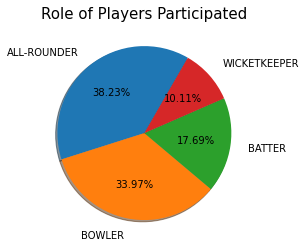

In [67]:
# using the above table"types", plot the pie-chart showing types of players and percentage of players in each category

# label parameter must be an array with one label
# The startangle parameter is defined with an angle in degrees
# shadow to the pie chart by setting the shadows parameter to True
# autopct enables you to display the percent value using Python string formatting.

plt.pie(types.values, labels=types.index,labeldistance=1.2,autopct='%1.2f%%', shadow=True, startangle=60 )
plt.title('Role of Players Participated', fontsize = 15)
plt.plot()

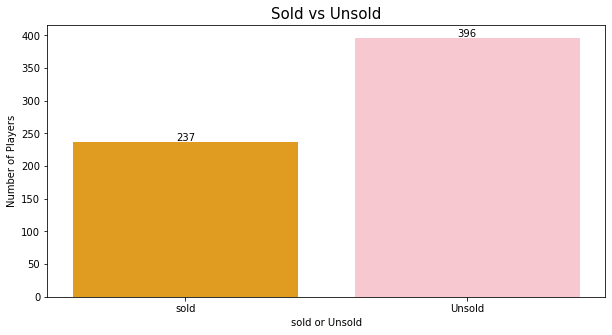

In [72]:
# players sold and unsold using a bar graph
#seaborn(sns).countplot() method is used to Show the counts of observations in each categorical bin using bars.
#sns.color_palette(), which can be used for coloring the plot

plt.figure(figsize=(10,5))
fig = sns.countplot(ipl['status'],palette=['Orange','Pink'])
plt.xlabel('sold or Unsold')
plt.ylabel('Number of Players')
plt.title('Sold vs Unsold', fontsize=15)
plt.plot()

#function below display the details of the bar
# patches is used to  patch to a plot with lower left at xy = (x, y) with specified width, height,
for p in fig.patches:
    fig.annotate(format(p.get_height(), '.0f'), (p.get_x() +
    p.get_width()/2., p.get_height()), ha = 'center' , va = 'center',
    xytext = (0, 4), textcoords = 'offset points')
                                                 
                                                 
                                                 

In [73]:
# total sold and unsold players

ipl.groupby('status')['Player'].count()

status
Unsold    396
sold      237
Name: Player, dtype: int64

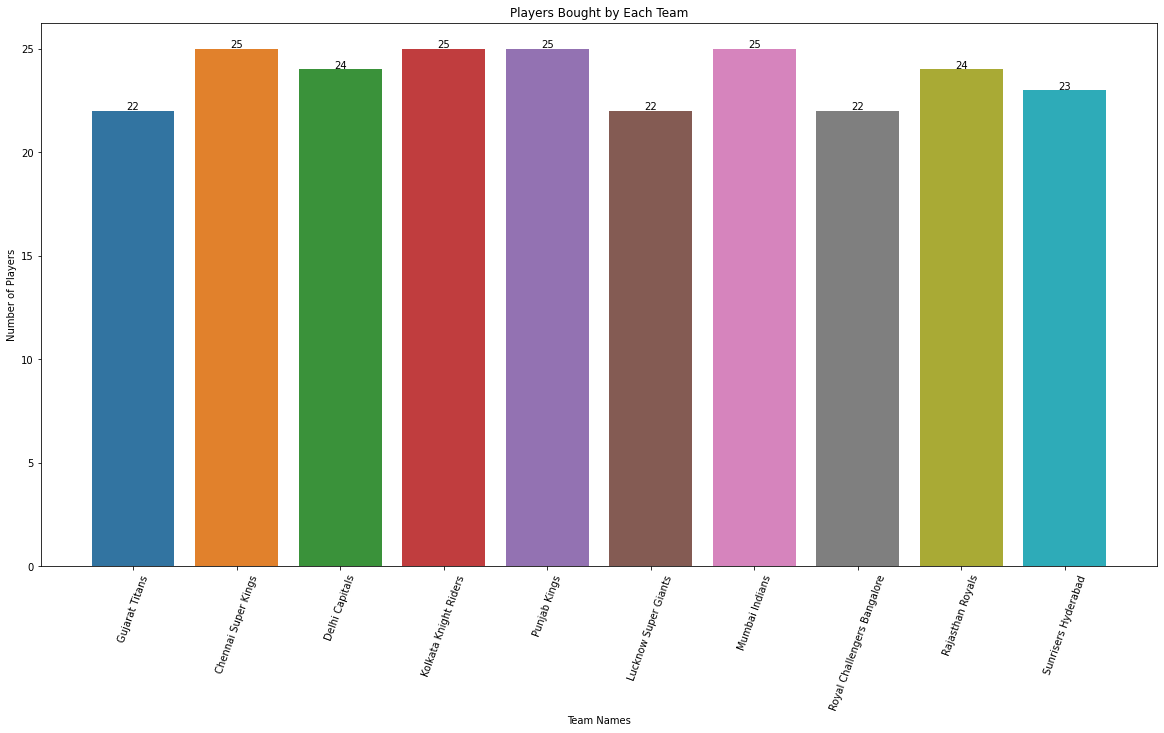

In [74]:
# Total number of players bought by each team


'''The plt.xticks() means x-labels will be tilted by 70 degrees.'''

plt.figure(figsize=(20,10))
fig = sns.countplot(ipl[ipl['Team']!='Unsold']['Team'])
plt.xlabel('Team Names')
plt.ylabel('Number of Players')
plt.title('Players Bought by Each Team', fontsize=12)
plt.xticks(rotation=70)
plt.plot()


for p in fig.patches:
    fig.annotate(format(p.get_height(), '.0f'), (p.get_x() +
    p.get_width()/2., p.get_height()), ha = 'center' , va = 'center',
    xytext = (0, 4), textcoords = 'offset points')

In [75]:
# Creating 3 columns--retention, Base price and Base_price_unit

ipl['retention'] = ipl['Base Price']

In [77]:
ipl['retention'].replace(['2 Cr', '40 Lakh','20 Lakh', '1 cr','75 Lakh','50 Lakh','30 Lakh','1.5 Cr'],
                          'From Auction', inplace = True)

In [78]:
# Treating Base Price by making draft pick to zero
# splitting Base price into base_price_unit and base price 

ipl['Base Price'].replace('Draft Pick',0, inplace = True)

In [82]:
# splitting base price into base_price_unit(cr,lakh) and base price(values like 2,20)
#We use lambda functions when we require a nameless function for a short period of time.

ipl['base_price'] = ipl['Base Price'].apply(lambda x: str(x).split(' ')[0])
ipl['base_Price_unit'] = ipl['Base Price'].apply(lambda x: str(x).split(' ')[-1])


In [83]:
# Replaced retained by zero in Base Price column

ipl['Base Price'].replace('Draft Pick',0, inplace = True)

In [84]:
ipl.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_Price_unit,base_price
0,Rashid Khan,0,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold,Draft Pick,0,0
1,Hardik Pandya,0,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold,Draft Pick,0,0
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold,From Auction,Cr,2
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold,From Auction,Lakh,40
4,Shubman Gill,0,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold,Draft Pick,0,0


In [90]:
# Total players retained and bought by each team

ipl.groupby(['Team','retention'])['retention'].count()[:-1]

Team                         retention   
Chennai Super Kings          1 Cr             2
                             From Auction    19
                             Retained         4
Delhi Capitals               1 Cr             1
                             From Auction    19
                             Retained         4
Gujarat Titans               1 Cr             3
                             Draft Pick       3
                             From Auction    16
Kolkata Knight Riders        1 Cr             3
                             From Auction    18
                             Retained         4
Lucknow Super Giants         1 Cr             1
                             Draft Pick       3
                             From Auction    18
Mumbai Indians               1 Cr             3
                             From Auction    18
                             Retained         4
Punjab Kings                 1 Cr             2
                             From Auction    2

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Gujarat Titans'),
  Text(1, 0, 'Chennai Super Kings'),
  Text(2, 0, 'Delhi Capitals'),
  Text(3, 0, 'Kolkata Knight Riders'),
  Text(4, 0, 'Punjab Kings'),
  Text(5, 0, 'Lucknow Super Giants'),
  Text(6, 0, 'Mumbai Indians'),
  Text(7, 0, 'Royal Challengers Bangalore'),
  Text(8, 0, 'Rajasthan Royals'),
  Text(9, 0, 'Sunrisers Hyderabad')])

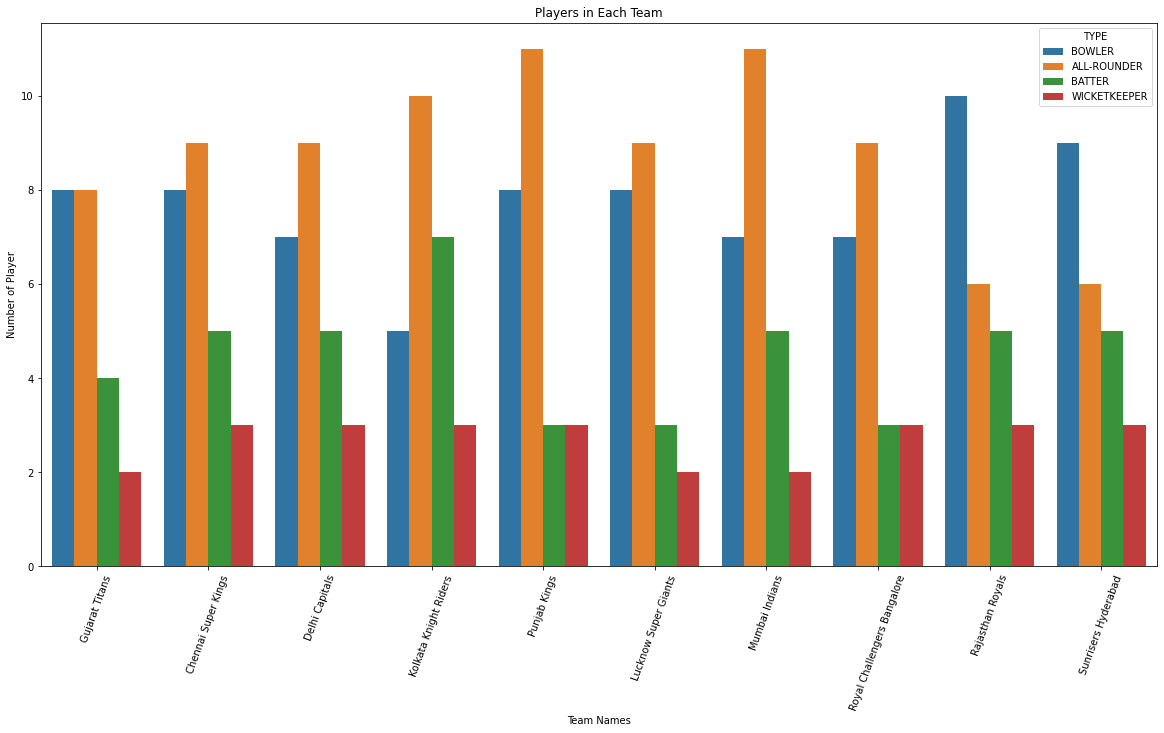

In [107]:
# Displaying the players in each team based on type of players

# hue parameter take column name for colour encoding. data : (optional)

plt.figure(figsize=(20,10))
fig = sns.countplot(ipl[ipl['Team']!='Unsold']['Team'],hue=ipl['TYPE']) 
plt.title('Players in Each Team')
plt.xlabel('Team Names')
plt.ylabel('Number of Player')
plt.xticks(rotation=70)

In [96]:
# player retained at maximum price

ipl[ipl['retention']=='Retained'].sort_values(by = 'COST IN ₹ (CR.)', ascending = False).head(1)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_Price_unit,base_price
22,Ravindra Jadeja,Retained,ALL-ROUNDER,16.0,2080.0,CSK,Chennai Super Kings,sold,Retained,Retained,Retained


In [102]:
# displaying top 5 bowlers picked in this year ipl


ipl[(ipl['retention']=='From Auction') & (ipl['TYPE'] =='BOWLER')].sort_values(by='COST IN ₹ (CR.)',ascending = False)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_Price_unit,base_price
23,Deepak Chahar,2 Cr,BOWLER,14.00,1820.0,CSK,Chennai Super Kings,sold,From Auction,Cr,2
48,Shardul Thakur,2 Cr,BOWLER,10.75,1397.5,CSK,Delhi Capitals,sold,From Auction,Cr,2
2,Lockie Ferguson,2 Cr,BOWLER,10.00,1300.0,KKR,Gujarat Titans,sold,From Auction,Cr,2
122,Avesh Khan,20 Lakh,BOWLER,10.00,1300.0,DC,Lucknow Super Giants,sold,From Auction,Lakh,20
98,Kagiso Rabada,2 Cr,BOWLER,9.25,1202.5,DC,Punjab Kings,sold,From Auction,Cr,2
...,...,...,...,...,...,...,...,...,...,...,...
345,Marchant De Lange,2 Cr,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold,From Auction,Cr,2
344,Taskin Ahmed,50 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold,From Auction,Lakh,50
326,Midhun Sudhesan,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold,From Auction,Lakh,20
324,Pardeep Sahu,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold,From Auction,Lakh,20


In [104]:
# players who were in ipl last season and not now

#first, renaming the column name 2021 squad into prev team

ipl = ipl.rename(columns={'2021 Squad':'Prev_team'})

In [105]:

unsold_players = ipl[(ipl.Prev_team!= 'Not Participated') & (ipl.Team == 'Unsold')][['Player','Prev_team']]

In [106]:
print(unsold_players)

                      Player Prev_team
237             Suresh Raina       CSK
238              Steve Smith        DC
239          Shakib Al Hasan       KKR
240              Amit Mishra        DC
241              Adil Rashid      PBKS
242              Imran Tahir       CSK
243            Mujeeb Zadran       SRH
244               Adam Zampa       RCB
245            Rajat Patidar       RCB
246     Mohammed Azharuddeen       RCB
249             M. Siddharth        DC
252              Dawid Malan      PBKS
253              Eoin Morgan       KKR
254        Cheteshwar Pujara       CSK
255           Saurabh Tiwary        MI
257            Ishant Sharma        DC
259            Piyush Chawla        MI
260           Tabraiz Shamsi        RR
262              Sachin Baby       RCB
267              Virat Singh       SRH
269              Akash Singh        RR
273               Chris Lynn        MI
276            George Garton       RCB
288               Andrew Tye        RR
289          Sandeep Warr